In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Exploring the dataset
data=pd.read_csv('houses.csv')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [3]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'price'],
      dtype='object')

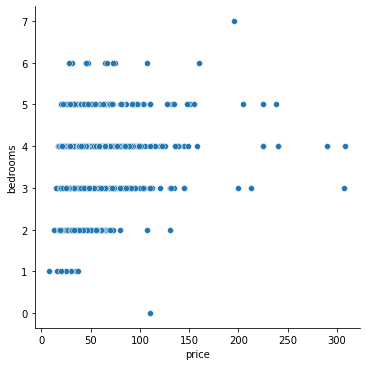

In [50]:
sns.relplot(x='price',y='bedrooms',data=data)

<AxesSubplot:>

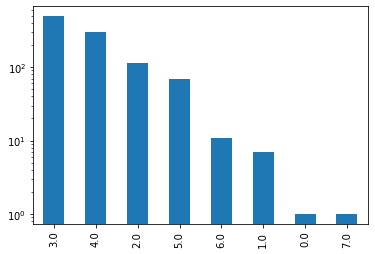

In [6]:
data['bedrooms'].value_counts().plot(kind='bar',logy=True)

Text(0.5, 1.0, 'House Ratings')

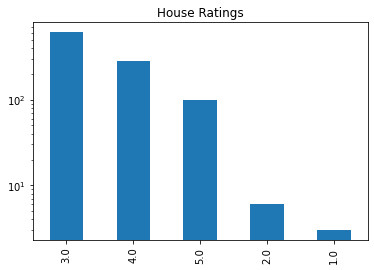

In [22]:
data['condition'].value_counts().plot(kind='bar',logy=True)
plt.title('House Ratings')

<AxesSubplot:>

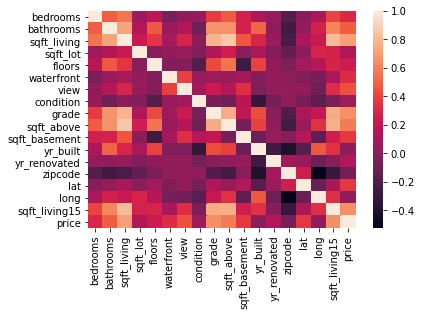

In [58]:
sns.heatmap(data.corr(),annot=True)

In [74]:
data.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
price            0
dtype: int64

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [123]:
train=data.drop(['price'],axis=1)
test=data['price']

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(train,test,test_size=0.3,random_state=3)

In [132]:
regr=LinearRegression()

In [133]:
regr.fit(X_train,Y_train)

LinearRegression()

In [134]:
pred=regr.predict(X_test)

In [135]:
pred

array([ 90.91496158,  31.1252235 ,  52.85130902,  29.32531349,
        77.3577116 ,  78.46709845,  50.46426225,  86.03394374,
        53.53962126,  59.7658074 ,  51.0485511 ,  64.09685632,
        46.21058565,  29.12126981,  27.72609918,  81.00519516,
        81.40111228,  55.96094981,  27.20289382,  99.30100173,
       197.33767802,  73.34845992,  49.92963309,  45.21169614,
        55.86723481,  46.28632562,  65.70114597,  47.33924773,
        32.36543208,  64.79927033,  16.28274067,  24.17926221,
        87.85522361,  65.73859964, 103.99594992,  68.23578312,
       108.99119552,  30.84164863,  63.88736598,  50.05603461,
        43.06043271,  77.73108922,  65.84215813,  15.67787075,
        17.56996271,  33.13674286,  37.05082651,  33.68840434,
        33.99539282,  48.23106655,  67.065463  ,  59.38792646,
        59.04990302,  43.7236112 ,  91.51839352,  38.09064011,
        38.05193603,  41.57982228,  78.18105044, 131.9612895 ,
        48.17094753,  51.16369065,  63.78454565,  39.08

In [140]:
print('Model Accuracy:',regr.score(X_test,Y_test))

Model Accuracy: 0.6968907038589149
